## Principal Component Analysis

In this notebook, we demonstrated the importance of PCA in selecting important variables that impacts the dataset and also developed a logistic regression model

In [1]:
#Import all necessary library and packages


import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
#loading the dataset

breast_cancer_data = load_breast_cancer()

In [3]:
#converting the dataset to a Dataframe

df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
df['target'] = breast_cancer_data.target  # Add the target variable to the DataFrame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.shape

(569, 31)

In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

The dataset is clean, as it has no null/missing value and no duplicates. the dataset has 31 columns and 569 rows.

In [8]:
#scale the dataset

df1=df.drop('target', axis=1) #we have to drop the target column
scaler = StandardScaler()
scaled_df=scaler.fit_transform(df1)

In [9]:
scaled_df1=pd.DataFrame(scaled_df)
scaled_df1.columns=(breast_cancer_data.feature_names)
scaled_df1.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391


Before implementing the PCA, we have to normalize our dataset, that is bring all the value to a common scale.

In [10]:
#PCA implementation

pca = PCA(n_components=None)  # We'll start by keeping all components
scaled_df_pca = pca.fit_transform(scaled_df)

In [11]:
#print the expalined variance of each components
explained_variance = pca.explained_variance_ratio_

print("Explained variance for each component:\n")
for i, variance in enumerate(explained_variance):
    print(f"Component {i + 1}: {variance:.6f}")

Explained variance for each component:

Component 1: 0.442720
Component 2: 0.189712
Component 3: 0.093932
Component 4: 0.066021
Component 5: 0.054958
Component 6: 0.040245
Component 7: 0.022507
Component 8: 0.015887
Component 9: 0.013896
Component 10: 0.011690
Component 11: 0.009797
Component 12: 0.008705
Component 13: 0.008045
Component 14: 0.005234
Component 15: 0.003138
Component 16: 0.002662
Component 17: 0.001980
Component 18: 0.001754
Component 19: 0.001649
Component 20: 0.001039
Component 21: 0.000999
Component 22: 0.000915
Component 23: 0.000811
Component 24: 0.000602
Component 25: 0.000516
Component 26: 0.000273
Component 27: 0.000230
Component 28: 0.000053
Component 29: 0.000025
Component 30: 0.000004


The explained variance ratio tells the proportion of the dataset variance that each component captures. This ratio is important to determine how many of the component are necessary to cover majority of the dataset's variable. The first component covers 44% of the variance, the second variance covers 19% of the variance, the third variance 9% of the variance while the last variance covers 7% of the variance.

In [12]:
#print the cumulative variance of each components

cumulative_variance = np.cumsum(explained_variance)

# Print cumulative variance
print("Cumulative Explained Variance for each component:\n")
for i, variance in enumerate(cumulative_variance):
    print(f"Component {i + 1}: {variance:.6f}")

Cumulative Explained Variance for each component:

Component 1: 0.442720
Component 2: 0.632432
Component 3: 0.726364
Component 4: 0.792385
Component 5: 0.847343
Component 6: 0.887588
Component 7: 0.910095
Component 8: 0.925983
Component 9: 0.939879
Component 10: 0.951569
Component 11: 0.961366
Component 12: 0.970071
Component 13: 0.978117
Component 14: 0.983350
Component 15: 0.986488
Component 16: 0.989150
Component 17: 0.991130
Component 18: 0.992884
Component 19: 0.994533
Component 20: 0.995572
Component 21: 0.996571
Component 22: 0.997486
Component 23: 0.998297
Component 24: 0.998899
Component 25: 0.999415
Component 26: 0.999688
Component 27: 0.999918
Component 28: 0.999971
Component 29: 0.999996
Component 30: 1.000000


The cumulative explained variance shows the percentage of total variance of the dataset covered by the explained variance when added. It takes about 7 principal componet to cover 90% of thetotal  dataset's variance and 10 principal components to capture 95% of the total dataset's variance. The cumulative variance tells us when to reduce dimensionality. Reduction of the dimensionality depends on the analyst and what the task at hand is trying to solve.

For this project, we will reduce our dimension to 2 principal component.

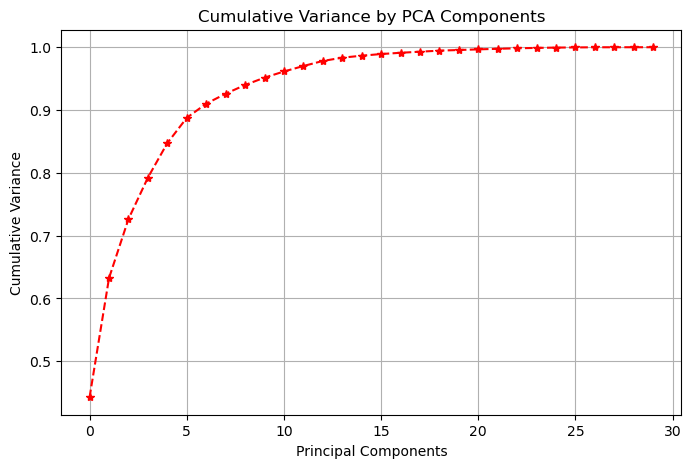

In [13]:
# Plot the explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='*', linestyle='--', color='r')
plt.title('Cumulative Variance by PCA Components')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()

from the plot above, there's a steady increase of cumulative variance from addition of principal components. From Component 1 to 13, the datapoint increases while it gradually flattens from 15 to 30. This indicates that after component 15, where 95% of the total variance has been covered, addition of further components adds little to no significance to the outcome of the dataset. 

### DIMENSIONALITY REDUCTION 

Here we will reduce our PCA component to 2 to further analyse the dataset.

In [14]:
#set our pca to 2

pca2= PCA(n_components=2)

#apply the PCA

scaled_df_pca2 = pca2.fit_transform(scaled_df)

In [15]:
#calculating our expalained variance

#print the expalined variance of each components
explained_variance2 = pca2.explained_variance_ratio_

print("Explained variance for each component:\n")
for i, variance in enumerate(explained_variance2):
    print(f"Component {i + 1}: {variance:.6f}")

Explained variance for each component:

Component 1: 0.442720
Component 2: 0.189712


In [16]:
#visualizing the reduced dimensionality

#first convert to df
pd_pca2= pd.DataFrame(scaled_df_pca2, columns=['Principal Component 1', 'Principal Component 2'])
pd_pca2['Target']= breast_cancer_data.target

pd_pca2

,Principal Component 1,Principal Component 2,Target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


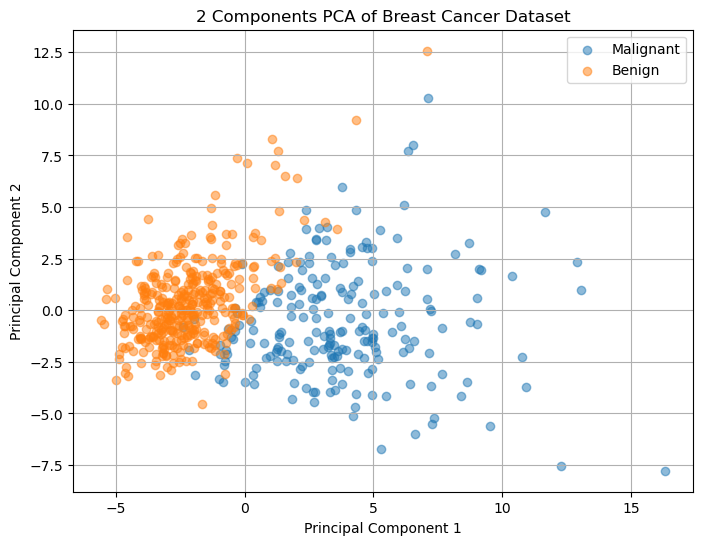

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(pd_pca2[pd_pca2['Target'] == 0]['Principal Component 1'], 
            pd_pca2[pd_pca2['Target'] == 0]['Principal Component 2'], 
            label='Malignant', alpha=0.5)
plt.scatter(pd_pca2[pd_pca2['Target'] == 1]['Principal Component 1'], 
            pd_pca2[pd_pca2['Target'] == 1]['Principal Component 2'], 
            label='Benign', alpha=0.5)
plt.title('2 Components PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

  The scatterplot shows the distribution of the datapoints along two principal components. There's a class sepeartion of the target variables which has been aided by the dimemsionality reduction of the dataset to 2 principal components. By reducing the dimensionality of the data to two principal components, it allows for an intuitive assessment of how well the malignant and benign cases can be distinguished based on the features used in the analysis.  

### Logistic Regression

In [18]:
# seperate the dataset into train and test dataset

X_train, X_test, y_train, y_test = train_test_split(scaled_df_pca2, df['target'], test_size=0.2, random_state=42)

In [19]:
#creating the logistic regression model

logreg= LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [20]:
#using the model to predict

y_pred= logreg.predict(X_test)

In [21]:
#Evaluate the accuracy of the model

accuracy = accuracy_score(y_test, y_pred)
conf_matrix= confusion_matrix(y_test, y_pred)

print(f"Logistic Regression Accuracy on PCA-reduced data: {accuracy * 100:.2f}% \n")
print(f"Confusion Matrix on PCA-reduced data: {conf_matrix}")

Logistic Regression Accuracy on PCA-reduced data: 99.12% 

Confusion Matrix on PCA-reduced data: [[42  1]
 [ 0 71]]


The model is performing well with an accuracy of 99.12%

In the confusion matrix the model has a true positive of 42 and true negative value of 71. Meaning it predicted the cancer cases correctly.